In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import seaborn as sb
import plotly.express as px

In [2]:
data = pd.read_csv('Grp3Project_InitialData/listings.csv')
df = data.drop('license', axis = 1)
df= df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31505 entries, 0 to 39880
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              31505 non-null  int64  
 1   name                            31505 non-null  object 
 2   host_id                         31505 non-null  int64  
 3   host_name                       31505 non-null  object 
 4   neighbourhood_group             31505 non-null  object 
 5   neighbourhood                   31505 non-null  object 
 6   latitude                        31505 non-null  float64
 7   longitude                       31505 non-null  float64
 8   room_type                       31505 non-null  object 
 9   price                           31505 non-null  int64  
 10  minimum_nights                  31505 non-null  int64  
 11  number_of_reviews               31505 non-null  int64  
 12  last_review                     

In [3]:
#Remove zero values from the data
df = df.loc[(df['price']> 0)]
df['lat_lon']= df.latitude/df.longitude
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,lat_lon
count,3.148800e+04,3.148800e+04,31488.000000,31488.000000,31488.000000,31488.000000,31488.000000,31488.000000,31488.000000,31488.000000,31488.000000,31488.000000
mean,9.107424e+16,1.280241e+08,40.727934,-73.944291,183.180799,16.657489,33.784267,1.245121,10.071678,131.788840,9.813866,-0.550793
std,2.211941e+17,1.437907e+08,0.059590,0.058740,287.039892,28.969508,61.381473,1.992040,35.076519,135.818431,20.650467,0.000935
min,2.539000e+03,2.438000e+03,40.500314,-74.266750,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,-0.554327
25%,1.513988e+07,1.279861e+07,40.686338,-73.982632,80.000000,2.000000,3.000000,0.140000,1.000000,0.000000,0.000000,-0.551389
50%,3.496438e+07,5.533170e+07,40.722685,-73.952670,130.000000,5.000000,10.000000,0.570000,1.000000,81.000000,2.000000,-0.550625
75%,5.141170e+07,2.193474e+08,40.763440,-73.924480,205.000000,30.000000,36.000000,1.790000,3.000000,271.000000,12.000000,-0.550256
max,7.072726e+17,4.772572e+08,40.928810,-73.699730,10000.000000,1250.000000,1480.000000,123.000000,453.000000,365.000000,949.000000,-0.545517


In [8]:
# Aggregate listing data by neighborhood
df_hood = df.iloc[:,[0,4,5,6,7,9]]
df_grp_by_hood = df_hood.groupby('neighbourhood_group').agg({'latitude':['mean'],'longitude':['mean'], 'price': ['mean']})
df_grp_by_hood.columns = ['lat','long','price']
df_grp_by_hood = df_grp_by_hood.reset_index()
display(df_grp_by_hood)

,neighbourhood_group,lat,long,price
0,Bronx,40.856639,-73.878453,120.060278
1,Brooklyn,40.681186,-73.948952,155.448969
2,Manhattan,40.765315,-73.976263,238.569214
3,Queens,40.721405,-73.855218,129.653205
4,Staten Island,40.617449,-74.117221,132.263158


In [12]:
#Calculate outliers for each room type and borrough
df_borrough = df[[ 'neighbourhood_group', 'room_type','price']]
df_borrough['borrough-room'] = df['neighbourhood_group'] + "-" + df['room_type']


df_Home = df.loc[(df['room_type']== "Entire home/apt")]
df_PrivateRoom = df.loc[(df['room_type']== "Private room")]
df_SharedRoom = df.loc[(df['room_type']== "Shared room")]
df_HotelRoom = df.loc[(df['room_type']== "Hotel room")]
fig = px.box(df_borrough, x = 'borrough-room', y = 'price')
fig.show()

/var/folders/g3/0mtl_c7d4c35y6985mzb9wjh0000gn/T/ipykernel_9607/2497941114.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:

df_stats = df.groupby('room_type')['price'].describe()
df_stats.reindex()
#df_stats['Q1'] = df_stats["25%"]
display(df_stats)

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,18373.0,232.166766,279.512166,29.0,125.0,175.0,257.0,10000.0
Hotel room,139.0,396.330935,239.180042,100.0,253.5,307.0,478.0,1488.0
Private room,12560.0,111.346656,271.142030,10.0,57.0,77.0,107.0,10000.0
Shared room,416.0,117.290865,516.464958,15.0,41.0,65.0,85.0,10000.0


In [14]:

df_stats['IQR'] = df_stats["75%"]- df_stats["25%"]
df_stats['upper_outlier'] = df_stats["75%"] + (1.5 * df_stats['IQR'])
display(df_stats)

,count,mean,std,min,25%,50%,75%,max,IQR,upper_outlier
room_type,,,,,,,,,,
Entire home/apt,18373.0,232.166766,279.512166,29.0,125.0,175.0,257.0,10000.0,132.0,455.00
Hotel room,139.0,396.330935,239.180042,100.0,253.5,307.0,478.0,1488.0,224.5,814.75
Private room,12560.0,111.346656,271.142030,10.0,57.0,77.0,107.0,10000.0,50.0,182.00
Shared room,416.0,117.290865,516.464958,15.0,41.0,65.0,85.0,10000.0,44.0,151.00


,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,793.0,130.129887,76.700813,45.0,70.0,104.0,165.0,450.0
Brooklyn,8367.0,160.384965,86.753266,42.0,85.0,149.0,200.0,529.0
Manhattan,9303.0,185.942707,95.507265,42.0,116.0,165.0,240.0,795.0
Queens,3268.0,137.349143,80.716497,42.0,74.0,120.0,175.0,454.0
Staten Island,216.0,133.379630,69.309111,55.0,75.0,129.0,170.0,412.0


,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,12779.0,218.802410,78.897641,125.0,155.0,199.0,261.00,455.0
Hotel room,130.0,347.669231,149.495969,100.0,242.0,299.0,458.75,795.0
Private room,8764.0,90.226609,29.397778,55.0,68.0,82.0,102.00,183.0
Shared room,274.0,75.208029,26.509874,42.0,55.0,72.0,85.00,150.0


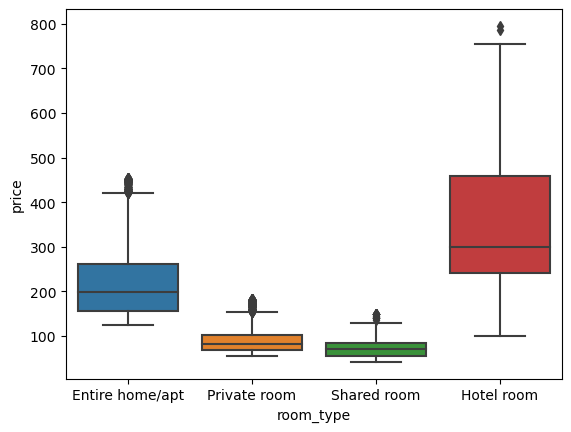

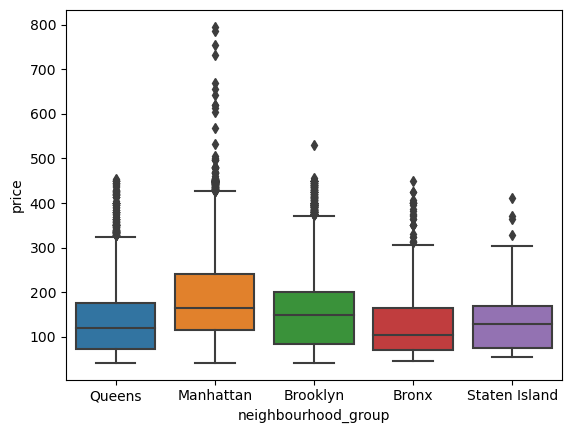

In [16]:
df1 = df[(df['room_type'] == "Entire home/apt") & (df['price']>= 125) & (df['price']<= 455)]
df2 = df[(df['room_type'] == "Private room") & (df['price']>= 55) & (df['price']<= 183)]
df3 = df[(df['room_type'] == "Shared room") & (df['price']>= 42) & (df['price']<= 152)] 
df4 = df[(df['room_type'] == "Hotel room") & (df['price']>= 100) & (df['price']<= 815)]
frames = [df1, df2, df3, df4]
df = pd.concat(frames)

display(df.groupby('neighbourhood_group')['price'].describe())
display(df.groupby('room_type')['price'].describe())
sb.boxplot(y = df['price'], x = df['room_type'])
plt.show()
sb.boxplot(y = df['price'], x = df['neighbourhood_group'])
plt.show()

In [17]:
df.info()
df.corr()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21947 entries, 2 to 19816
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              21947 non-null  int64  
 1   name                            21947 non-null  object 
 2   host_id                         21947 non-null  int64  
 3   host_name                       21947 non-null  object 
 4   neighbourhood_group             21947 non-null  object 
 5   neighbourhood                   21947 non-null  object 
 6   latitude                        21947 non-null  float64
 7   longitude                       21947 non-null  float64
 8   room_type                       21947 non-null  object 
 9   price                           21947 non-null  int64  
 10  minimum_nights                  21947 non-null  int64  
 11  number_of_reviews               21947 non-null  int64  
 12  last_review                     

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,lat_lon
id,1.000000,0.346365,-0.023564,0.125054,0.031295,-0.152515,-0.198092,0.286535,-0.054100,0.220638,-0.074522,-0.039132
host_id,0.346365,1.000000,0.016330,0.190202,0.000342,-0.155638,-0.121756,0.299897,0.016177,0.246123,0.153838,-0.105100
latitude,-0.023564,0.016330,1.000000,0.011416,-0.018692,0.051067,-0.029718,-0.056300,0.055964,-0.037222,-0.044066,-0.878909
longitude,0.125054,0.190202,0.011416,1.000000,-0.188578,-0.122766,0.021126,0.140384,-0.107775,0.201402,0.070767,-0.486990
price,0.031295,0.000342,-0.018692,-0.188578,1.000000,-0.034687,-0.022058,0.036315,0.151581,0.065972,0.059637,0.106350
minimum_nights,-0.152515,-0.155638,0.051067,-0.122766,-0.034687,1.000000,-0.124702,-0.262632,0.030949,-0.078542,-0.235216,0.014014
number_of_reviews,-0.198092,-0.121756,-0.029718,0.021126,-0.022058,-0.124702,1.000000,0.494944,-0.070689,0.078757,0.610482,0.015867
reviews_per_month,0.286535,0.299897,-0.056300,0.140384,0.036315,-0.262632,0.494944,1.000000,-0.024912,0.207948,0.773800,-0.017862
calculated_host_listings_count,-0.054100,0.016177,0.055964,-0.107775,0.151581,0.030949,-0.070689,-0.024912,1.000000,0.131058,0.007888,0.002559
availability_365,0.220638,0.246123,-0.037222,0.201402,0.065972,-0.078542,0.078757,0.207948,0.131058,1.000000,0.153152,-0.063686


In [18]:
df_select = df[['price','neighbourhood_group', 'lat_lon','room_type', 'minimum_nights', 'number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm']]
df_select.info()
#df_norm = scale(df.loc[:,'calories':'rating'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21947 entries, 2 to 19816
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           21947 non-null  int64  
 1   neighbourhood_group             21947 non-null  object 
 2   lat_lon                         21947 non-null  float64
 3   room_type                       21947 non-null  object 
 4   minimum_nights                  21947 non-null  int64  
 5   number_of_reviews               21947 non-null  int64  
 6   reviews_per_month               21947 non-null  float64
 7   calculated_host_listings_count  21947 non-null  int64  
 8   availability_365                21947 non-null  int64  
 9   number_of_reviews_ltm           21947 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


In [19]:
 # One-hot encode the categorical column
dfx = pd.concat([df_select,
               pd.get_dummies(df_select['neighbourhood_group'])],axis=1)


In [20]:
X = pd.concat([dfx,
               pd.get_dummies(dfx['room_type'])],axis=1)
            
# Drop the original categorical column and the response variable
df = X.drop(['neighbourhood_group','room_type'], axis=1)
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21947 entries, 2 to 19816
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           21947 non-null  int64  
 1   lat_lon                         21947 non-null  float64
 2   minimum_nights                  21947 non-null  int64  
 3   number_of_reviews               21947 non-null  int64  
 4   reviews_per_month               21947 non-null  float64
 5   calculated_host_listings_count  21947 non-null  int64  
 6   availability_365                21947 non-null  int64  
 7   number_of_reviews_ltm           21947 non-null  int64  
 8   Bronx                           21947 non-null  uint8  
 9   Brooklyn                        21947 non-null  uint8  
 10  Manhattan                       21947 non-null  uint8  
 11  Queens                          21947 non-null  uint8  
 12  Staten Island                   

None

In [21]:
X = scale(df)
display(pd.DataFrame(X).describe().transpose())
corr_ = pd.DataFrame(X).corr()
pd.DataFrame(corr_).style.background_gradient(cmap = 'YlOrRd')

,count,mean,std,min,25%,50%,75%,max
0,21947.0,3.401602e-15,1.000023,-1.363835,-0.837721,-0.180078,0.477565,6.889584
1,21947.0,-6.383449e-14,1.000023,-3.977511,-0.647782,0.194179,0.567985,5.323393
2,21947.0,2.949408e-15,1.000023,-0.505362,-0.470340,-0.365276,0.510259,43.236355
3,21947.0,9.776964e-16,1.000023,-0.554562,-0.522151,-0.392510,0.045031,23.412935
4,21947.0,-9.548768e-16,1.000023,-0.763311,-0.673385,-0.362995,0.385423,34.911280
5,21947.0,-7.650554e-15,1.000023,-0.250392,-0.250392,-0.250392,-0.190779,13.222274
6,21947.0,-4.515760e-15,1.000023,-1.016062,-1.016062,-0.346316,1.044696,1.670283
7,21947.0,-5.402750e-15,1.000023,-0.571298,-0.571298,-0.409724,0.182712,47.254502
8,21947.0,2.428026e-14,1.000023,-0.193616,-0.193616,-0.193616,-0.193616,5.164873
9,21947.0,-1.196240e-15,1.000023,-0.784937,-0.784937,-0.784937,1.273987,1.273987


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.000000,0.106350,-0.034687,-0.022058,0.036315,0.151581,0.065972,0.059637,-0.077034,-0.052003,0.183459,-0.133322,-0.036116,0.677731,0.153344,-0.681011,-0.112422
1,0.106350,1.000000,0.014014,0.015867,-0.017862,0.002559,-0.063686,0.004689,-0.480750,0.566212,-0.240550,-0.270386,0.302301,0.123213,-0.000094,-0.119712,-0.019182
2,-0.034687,0.014014,1.000000,-0.124702,-0.262632,0.030949,-0.078542,-0.235216,-0.064413,-0.048154,0.134911,-0.080108,-0.027785,0.037286,-0.029715,-0.032068,-0.003634
3,-0.022058,0.015867,-0.124702,1.000000,0.494944,-0.070689,0.078757,0.610482,-0.015515,0.035035,-0.048637,0.024409,0.012411,-0.018578,0.053234,0.013222,-0.012592
4,0.036315,-0.017862,-0.262632,0.494944,1.000000,-0.024912,0.207948,0.773800,0.041839,0.008904,-0.125310,0.132035,0.028247,0.006911,0.032304,-0.008481,-0.015616
5,0.151581,0.002559,0.030949,-0.070689,-0.024912,1.000000,0.131058,0.007888,-0.031108,-0.149355,0.189769,-0.037707,-0.020355,0.092375,0.020494,-0.093407,-0.012461
6,0.065972,-0.063686,-0.078542,0.078757,0.207948,0.131058,1.000000,0.153152,0.113739,-0.049856,-0.128540,0.169152,0.063743,0.016139,0.050917,-0.025548,0.005814
7,0.059637,0.004689,-0.235216,0.610482,0.773800,0.007888,0.153152,1.000000,0.014271,0.015203,-0.079994,0.077383,0.019608,0.023907,0.021715,-0.022634,-0.021360
8,-0.077034,-0.480750,-0.064413,-0.015515,0.041839,-0.031108,0.113739,0.014271,1.000000,-0.151976,-0.166077,-0.080985,-0.019303,-0.060267,-0.014946,0.064975,-0.008576
9,-0.052003,0.566212,-0.048154,0.035035,0.008904,-0.149355,-0.049856,0.015203,-0.151976,1.000000,-0.673293,-0.328321,-0.078257,-0.000537,-0.054478,0.015294,-0.027424


In [22]:
# Select the number of components
pca1 = PCA(n_components=17)

# Fit the PCA model
pca1.fit(X)

PCA(n_components=17)

In [23]:
#The amount of variance that each PC explains
var = pca1.explained_variance_ratio_
display(var)

array([1.60412628e-01, 1.46373903e-01, 1.26994963e-01, 8.25542209e-02,
       7.07226028e-02, 6.39143638e-02, 6.10931129e-02, 6.05001450e-02,
       5.83132224e-02, 5.25287572e-02, 4.12036089e-02, 2.92629579e-02,
       2.04253306e-02, 1.36706502e-02, 1.20295340e-02, 4.84394500e-33,
       3.40520440e-33])

In [24]:
#Cumulative Variance explains
var1 = np.cumsum(np.round(pca1.explained_variance_ratio_, decimals=4)*100)
display(var1)

array([ 16.04,  30.68,  43.38,  51.64,  58.71,  65.1 ,  71.21,  77.26,
        83.09,  88.34,  92.46,  95.39,  97.43,  98.8 , 100.  , 100.  ,
       100.  ])

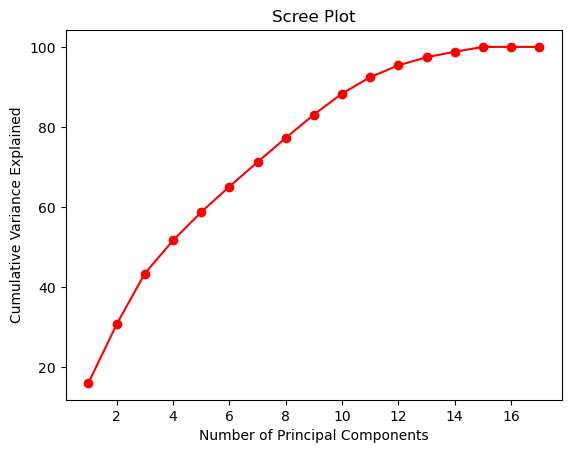

In [25]:
var1 = pd.DataFrame(var1, index=np.arange(1,18))
plt.plot(var1,'-o',color='red')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.savefig('scree_plot.png',dpi=200,bbox_inches='tight')

In [27]:
# Select the number of components
pca11 = PCA(n_components=11)
pca11.fit(X)
data_pca11 = pca11.transform(X)

# Convert the numpy array to pandas DataFrame
data_pca11 = pd.DataFrame(data_pca11)
data_pca11.columns = ["PC"+str(i) for i in range(1,12)]

# Show the head of the DataFrame
display(data_pca11.head())
display(data_pca11.corr())


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-1.853527,0.185785,0.763039,-2.471594,-2.028888,0.959184,-0.670023,0.045834,-0.301658,0.708047,-0.507098
1,-1.360941,-0.564348,0.841457,0.251740,-0.243831,-0.051529,0.283562,-0.095419,0.067201,0.633802,-1.195290
2,-1.688930,-0.210342,-2.063991,-0.921440,-0.036440,-0.230882,-0.260663,0.164355,0.099001,0.177307,-0.309820
3,-1.022819,-0.358704,-2.058278,-0.407880,0.555860,0.272243,-0.029288,-0.004740,0.002320,0.394929,0.523890
4,-0.984402,1.776170,0.955904,1.263583,0.109314,0.147309,0.424228,-0.198224,0.193696,1.615421,-1.259889


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
PC1,1.000000e+00,-2.034329e-16,-7.349493e-17,3.647032e-17,-5.620804e-16,-3.057746e-16,8.773304e-16,2.971273e-16,-3.259319e-16,-4.451975e-16,-2.156343e-16
PC2,-2.034329e-16,1.000000e+00,3.116528e-16,5.083325e-16,-8.985356e-17,-1.584222e-16,-1.256139e-16,1.246944e-16,-7.259801e-18,1.154320e-17,-1.989327e-16
PC3,-7.349493e-17,3.116528e-16,1.000000e+00,1.702211e-16,7.390034e-17,-3.148047e-16,1.724819e-16,4.140574e-16,-3.626067e-16,-2.331709e-17,-3.873641e-16
PC4,3.647032e-17,5.083325e-16,1.702211e-16,1.000000e+00,2.462801e-16,2.623097e-16,-4.285259e-16,4.493493e-16,2.518367e-16,6.109345e-17,-4.663727e-16
PC5,-5.620804e-16,-8.985356e-17,7.390034e-17,2.462801e-16,1.000000e+00,-1.246351e-16,-5.012299e-17,5.417474e-16,-1.029412e-15,8.216022e-16,8.553455e-16
PC6,-3.057746e-16,-1.584222e-16,-3.148047e-16,2.623097e-16,-1.246351e-16,1.000000e+00,-1.172446e-15,-2.794612e-16,6.535328e-16,-1.949050e-16,2.710010e-16
PC7,8.773304e-16,-1.256139e-16,1.724819e-16,-4.285259e-16,-5.012299e-17,-1.172446e-15,1.000000e+00,-6.114650e-16,7.491772e-16,5.698245e-16,-1.625073e-16
PC8,2.971273e-16,1.246944e-16,4.140574e-16,4.493493e-16,5.417474e-16,-2.794612e-16,-6.114650e-16,1.000000e+00,2.720547e-16,-3.866385e-16,3.807196e-16
PC9,-3.259319e-16,-7.259801e-18,-3.626067e-16,2.518367e-16,-1.029412e-15,6.535328e-16,7.491772e-16,2.720547e-16,1.000000e+00,-3.314538e-16,-3.394220e-16
PC10,-4.451975e-16,1.154320e-17,-2.331709e-17,6.109345e-17,8.216022e-16,-1.949050e-16,5.698245e-16,-3.866385e-16,-3.314538e-16,1.000000e+00,3.186316e-16


From the above correlation table, we can find that the pairwise correlations between two components are close to zeros. This means that all these components are orthogonal (not correlated). There is no multicollinearity among principal components.

PCA applies a linear transformation to transform the data to a new space with fewer dimensions. Let's show the loadings for the 1st principal component and explore how the 1st principal component is calculated from the normalized data.

In [28]:
# Show the loadings for the 1st components
pca11.components_[[0]]

array([[-0.49515564, -0.13289463, -0.07251583,  0.0792934 ,  0.0832473 ,
        -0.13800169,  0.02377633,  0.06229104,  0.11615815,  0.02693656,
        -0.20353317,  0.18365319,  0.00446557, -0.54816553, -0.04281784,
         0.54934057,  0.04132174]])

In [30]:
corr_11 = pd.DataFrame(pca11.components_.transpose(),
             index=df.loc[:,'price':'Shared room'].columns,
             columns=["PC"+str(i) for i in range(1,12)])
pd.DataFrame(corr_11).style.background_gradient(cmap = 'YlOrRd')

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
price,-0.495156,0.121565,0.057935,-0.086221,-0.013835,-0.059051,-0.145220,0.004753,-0.085772,-0.049283,-0.022964
lat_lon,-0.132895,0.077801,-0.555393,0.228680,-0.231914,-0.030518,0.019293,-0.001438,0.015720,-0.020570,-0.024321
minimum_nights,-0.072516,-0.253856,-0.015225,0.111448,-0.004717,0.143876,0.032510,-0.127214,0.179657,0.885854,0.142349
number_of_reviews,0.079293,0.445510,0.052618,0.253399,0.157812,0.084487,0.023890,-0.033983,-0.006687,0.228151,0.071484
reviews_per_month,0.083247,0.536858,0.100486,0.097304,0.033521,0.026877,0.037461,-0.020760,0.045589,0.018883,0.018222
calculated_host_listings_count,-0.138002,-0.024744,0.147398,0.122200,-0.344649,-0.272470,-0.124949,-0.038950,0.649019,-0.181455,0.512825
availability_365,0.023776,0.198743,0.116924,-0.271435,-0.412990,-0.319141,-0.028223,0.097788,0.264888,0.239880,-0.669221
number_of_reviews_ltm,0.062291,0.548868,0.095356,0.182894,0.083383,0.043395,0.042539,-0.046772,0.078303,0.050158,0.083821
Bronx,0.116158,0.005059,0.248880,-0.398371,0.368039,-0.518987,0.231031,-0.019736,-0.045028,0.112752,0.235427
Brooklyn,0.026937,0.106014,-0.599071,-0.135898,0.223872,-0.108198,-0.146589,0.088984,0.194446,0.030649,0.004030
